# HW-252-HW1-JT 

In [10]:
## Jingwen  Tan 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#store file path
xyName = 'sgb128_xy.txt'
distName = 'sgb128_dist.txt'

#read txt file
xy = np.loadtxt(xyName)
dist_file = np.loadtxt(distName)

#define dist function
def dist(a,b):
    (x1,y1) = a
    (x2,y2)= b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5



In [11]:
G=nx.Graph()

for i in range(len(xy)): # add node to graph
    G.add_node(i,pos=(xy[i][0],xy[i][1]))
    
for i in range(len(xy)): #add edge to graph
    for j in range(len(xy)):
        if(i !=j):
            loc1 = (xy[i])
            loc2 = (xy[j])
            if( dist(loc1,loc2)<=230):
                G.add_edge(i,j,weight= dist_file[i][j])
   



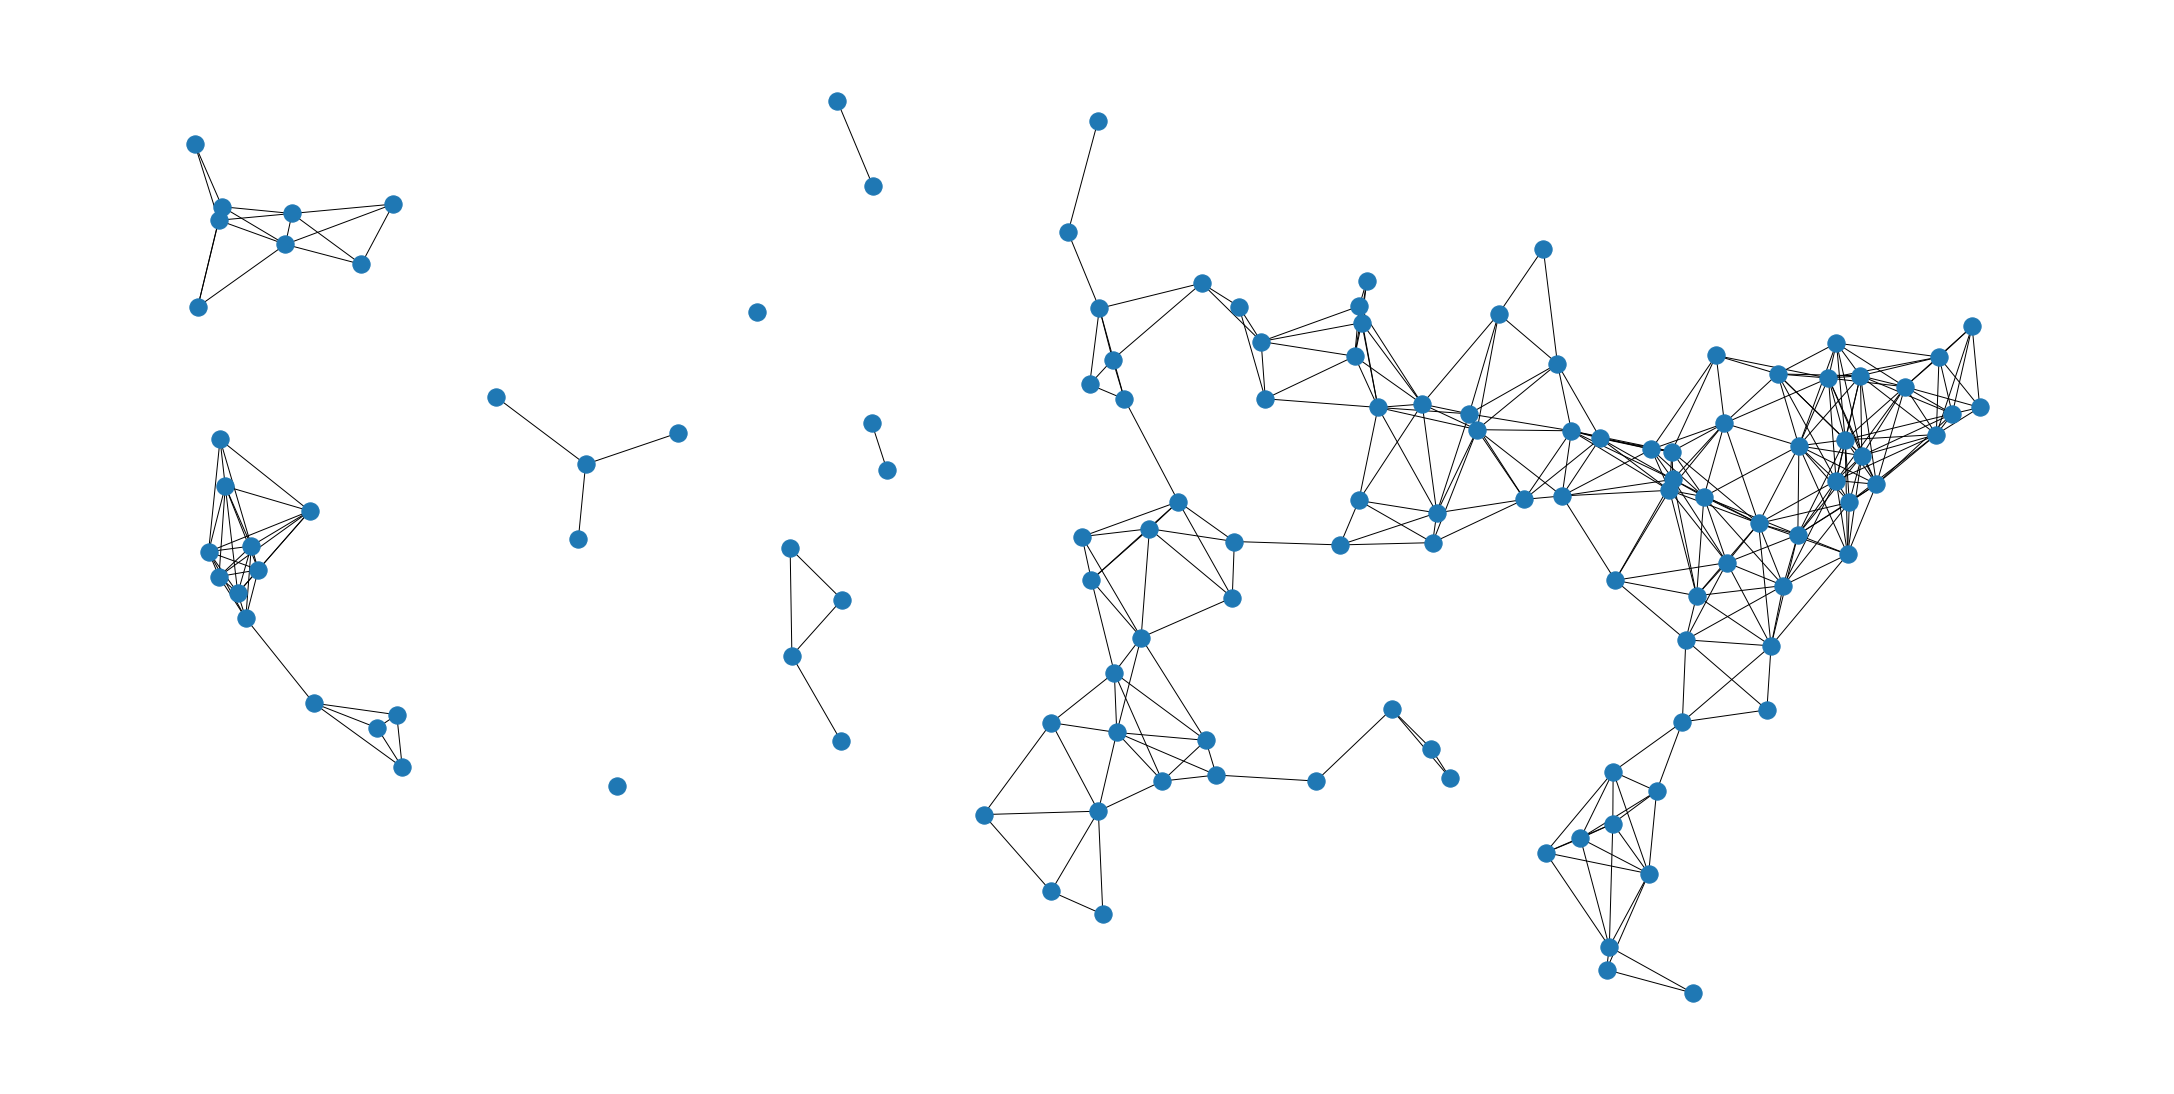

In [12]:
#Draw the graph 
plt.figure(figsize=(30,15)) 
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)

In [13]:
for i in range(11):
    #define heuristic fuc
    def h(a,b):
        (x1,y1) = G.nodes[a]['pos']
        (x2,y2)= G.nodes[b]['pos']
        if(i==0):
            weight=0.5
        else:
            weight=i
        return weight*(i+1)*((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    if(i==0):
        print("weight=0.5: ")
    else:
        print("\nweight="+str(i)+": ")
    print(nx.astar_path(G,6,16,heuristic=h,weight="weight"))

weight=0.5: 
[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]

weight=1: 
[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]

weight=2: 
[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 19, 52, 16]

weight=3: 
[6, 34, 22, 71, 104, 77, 103, 51, 120, 64, 12, 5, 57, 82, 108, 84, 16]

weight=4: 
[6, 34, 22, 71, 104, 77, 103, 51, 120, 64, 12, 5, 57, 82, 108, 84, 16]

weight=5: 
[6, 34, 22, 71, 104, 77, 103, 51, 120, 64, 12, 5, 57, 82, 108, 84, 16]

weight=6: 
[6, 34, 22, 71, 104, 77, 103, 51, 120, 64, 12, 5, 57, 82, 108, 84, 16]

weight=7: 
[6, 34, 22, 71, 104, 77, 103, 30, 120, 64, 12, 5, 57, 82, 108, 84, 16]

weight=8: 
[6, 34, 22, 71, 104, 77, 103, 30, 120, 64, 12, 5, 57, 82, 108, 84, 16]

weight=9: 
[6, 34, 22, 71, 104, 77, 103, 30, 120, 64, 12, 5, 57, 82, 108, 84, 16]

weight=10: 
[6, 34, 22, 71, 104, 77, 103, 30, 120, 64, 12, 5, 57, 82, 108, 84, 16]


From observation, as the weight increase, the solution is discovered faster with less nodes. However after weight =3, it seems like reach to minmium cost routine which turn the result unchange for the rest of sets. 

In [14]:
# Apply dijkstra() method
print(nx.single_source_dijkstra(G,6,16,weight="weight"))

(11588.0, [6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16])


Dijkstra function generate path that is identitical with A* when weight ranges from 0.5 to 2.  

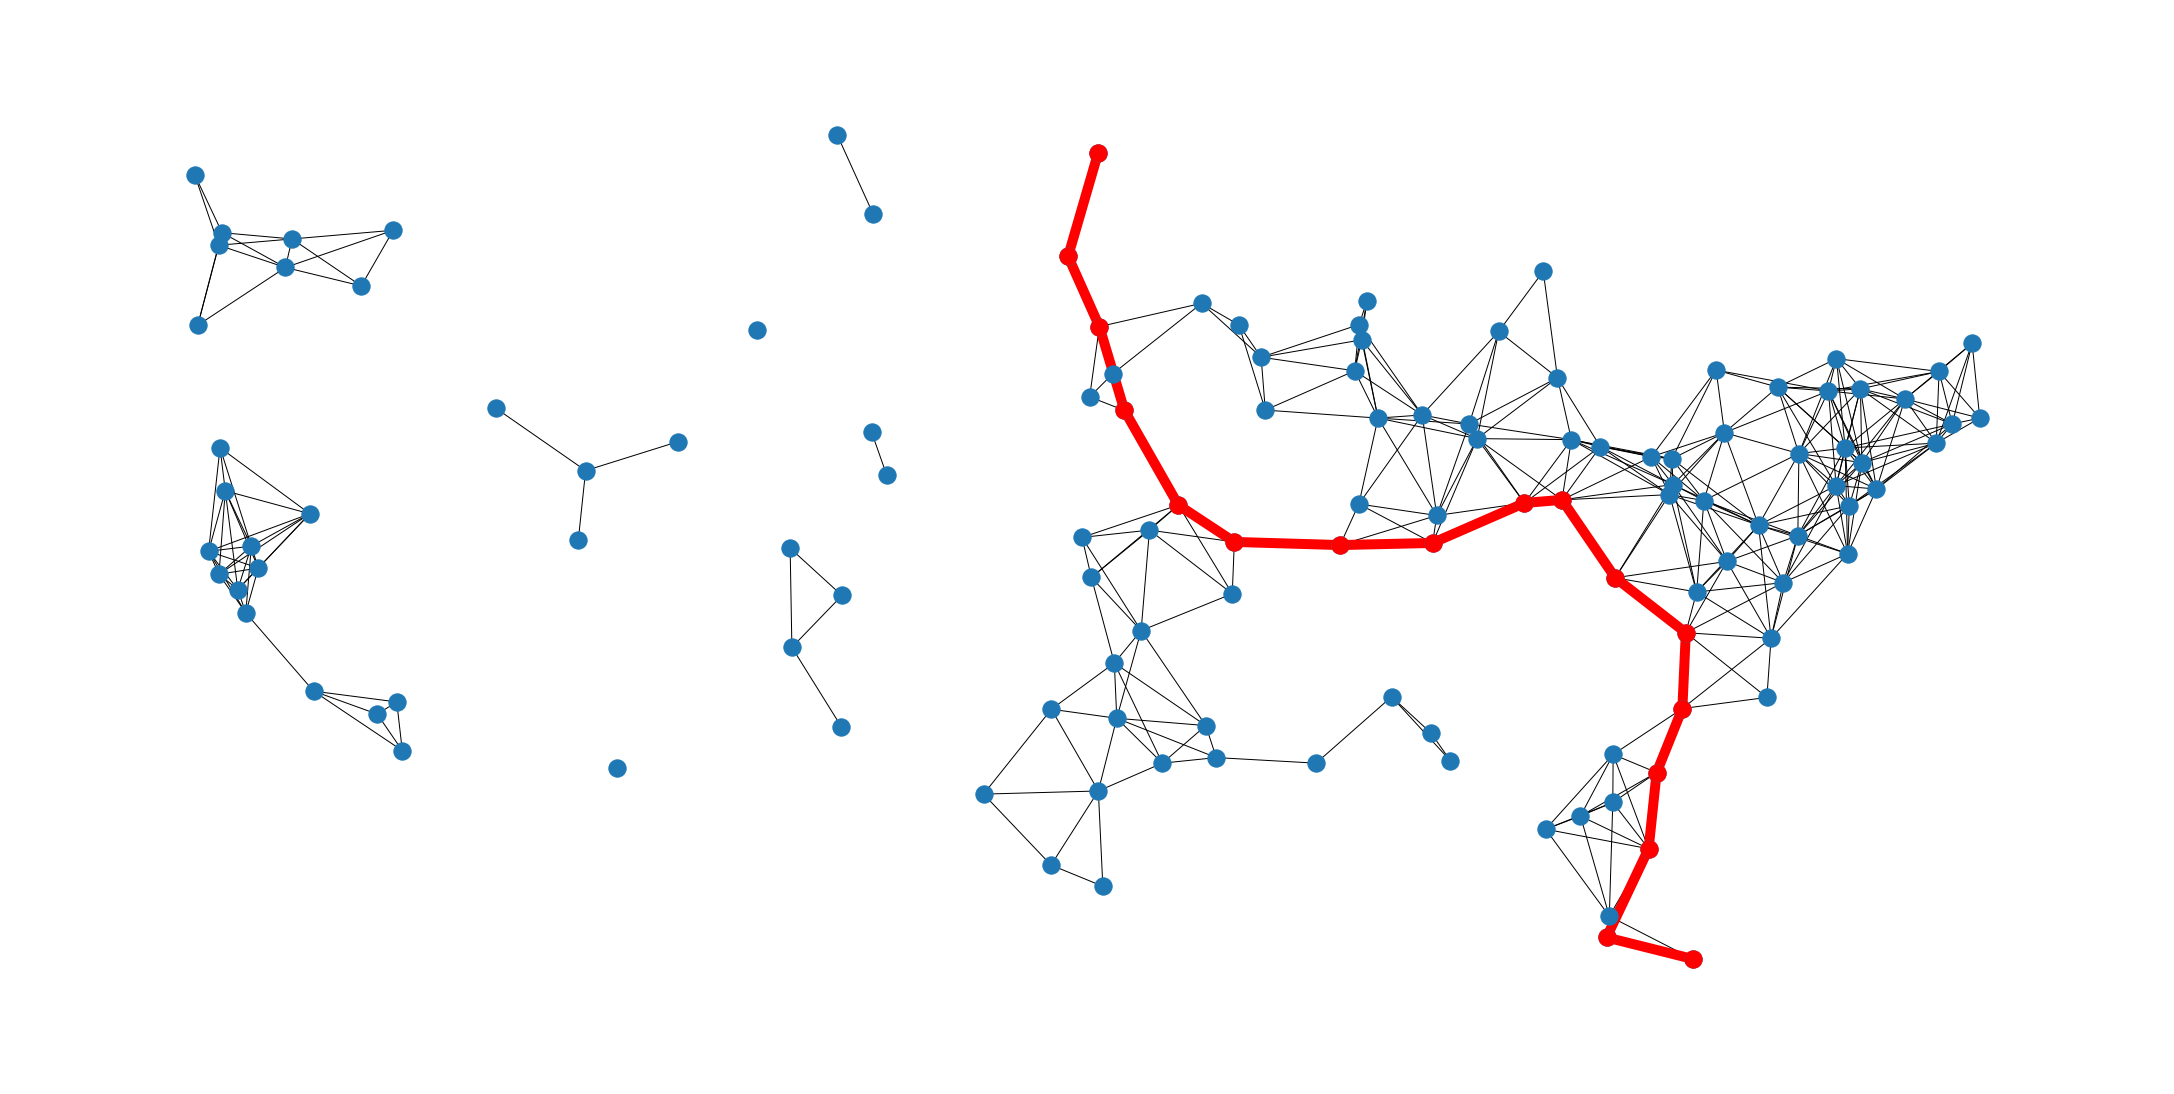

In [15]:
plt.figure(figsize=(30,15)) 
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
path=nx.astar_path(G,6,16,heuristic=h,weight="weight")
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=10)
plt.axis('equal')
plt.show()